In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
W = np.zeros([3,3])
W[0,0] = 2.; W[0,2] = .5;
W[1,1] = 2.; W[1,2] = .5;
W[2,:2] = -4

b = np.array([1,1,-2])

W =  W.T

print W
print b

[[ 2.   0.  -4. ]
 [ 0.   2.  -4. ]
 [ 0.5  0.5  0. ]]
[ 1  1 -2]


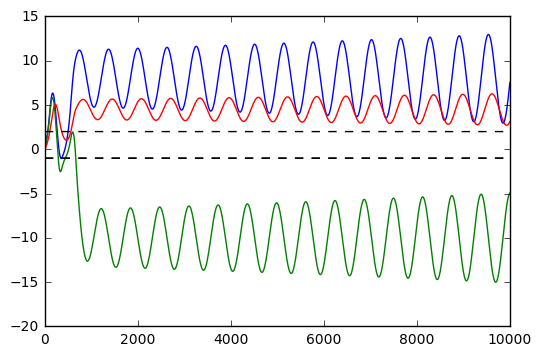

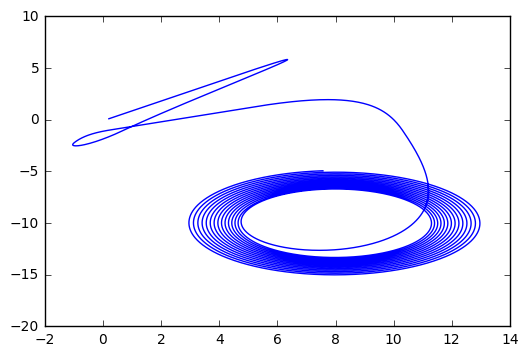

In [15]:
steps = 10000
alpha = .01

init = np.array([.2,.1,0])

I = np.zeros([np.shape(W)[0],steps])
I[:,0] = init

for ii in range(1,steps):
    I[:,ii] = (1-alpha)*I[:,ii-1] + alpha*(W.dot(np.maximum(I[:,ii-1]+ b,0)) )
    
plt.figure()   
plt.plot(I.T)

plt.plot(-np.ones(steps).reshape([steps,1]).dot(b.reshape([1,3])),'k--')

plt.figure()
plt.plot(I[0,:],I[1,:])

plt.show()

In [98]:
print (W-np.eye(3)).dot(np.maximum(I[:,-1]+ b,0))

[-0.89027398 -0.89027398  2.1670571 ]


In [63]:
xx = np.linspace(-2,2)
yy = np.linspace(-2,2)

out = np.zeros([3,len(xx),len(yy)])

for ii,x in enumerate(xx):
    for jj,y in enumerate(yy):
        out[:,ii,jj] = W.dot(np.maximum(np.array([x,y,3])+b,0))

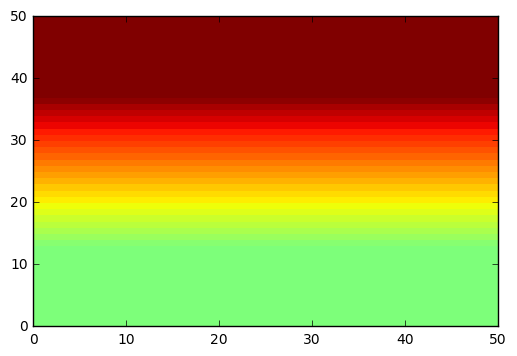

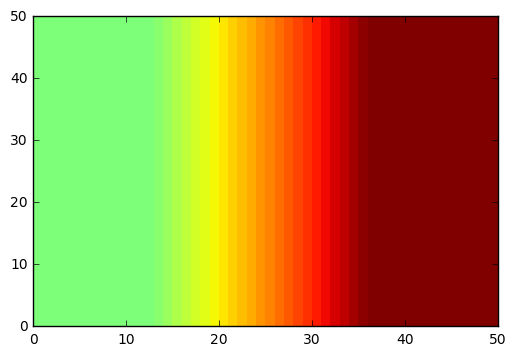

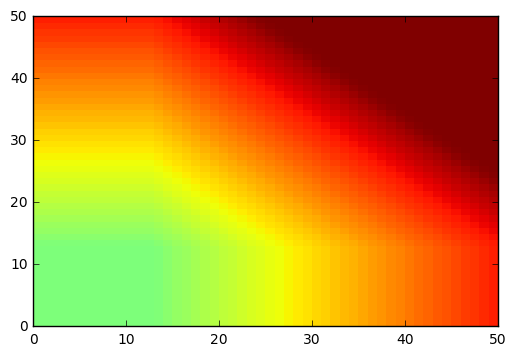

In [64]:
for ii in range(3):
    plt.figure()
    plt.pcolor(out[ii,:,:],vmin=-4,vmax=4)
plt.show()

In [93]:
np.ones(steps).reshape([steps,1]).dot(b.reshape([1,3]))

array([[ 1.,  1., -3.],
       [ 1.,  1., -3.],
       [ 1.,  1., -3.],
       ..., 
       [ 1.,  1., -3.],
       [ 1.,  1., -3.],
       [ 1.,  1., -3.]])

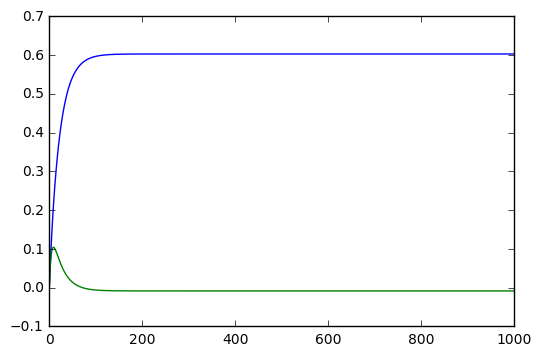

In [131]:
'''contractions and fixed points'''

def f(W,x):
    return W.dot(x) + .3

n_steps = 1000
I = np.zeros([2,n_steps])
alpha = .1

W = np.random.randn(2,2)
W = (.9*W)/np.max(np.abs(np.linalg.eig(W)[0]))

for ii in range(1,n_steps):
    I[:,ii] = alpha*f(W,I[:,ii-1]) + (1.-alpha)*I[:,ii-1]
    
plt.plot(I.T)
plt.show()

0.37499999999999994